In [1]:
from deepBreaks.preprocessing import read_data
import pandas as pd

wrk_dir = "./VPOD_1.1"
WdstestFileName = f"{wrk_dir}/wds_itr_test_results.csv"
VerttestFileName = f"{wrk_dir}/vert_itr_test_results.csv"
WTtestFileName = f"{wrk_dir}/wt_all_muts_pred_results.csv"

wds_test = read_data(WdstestFileName, seq_type = None, is_main=False)
vert_test = read_data(VerttestFileName, seq_type = None, is_main=False)
wt_test = read_data(WTtestFileName, seq_type = None, is_main=False)

In [2]:
wds_test = wds_test.set_index(wds_test['Accession'])
wds_test = wds_test.drop(columns='Accession')

wt_test = wt_test.set_index(wt_test['Accession'])
wt_test = wt_test.drop(columns='Accession')


In [3]:
wds_test['Sqr_Err'] = wds_test['Difference']**2
vert_test['Sqr_Err'] = vert_test['Difference']**2
wt_test['Sqr_Err'] = wt_test['Difference']**2

wds_test = wds_test.sort_values('Accession')
vert_test = vert_test.sort_values('Accession')
wt_test = wt_test.sort_values('Accession')

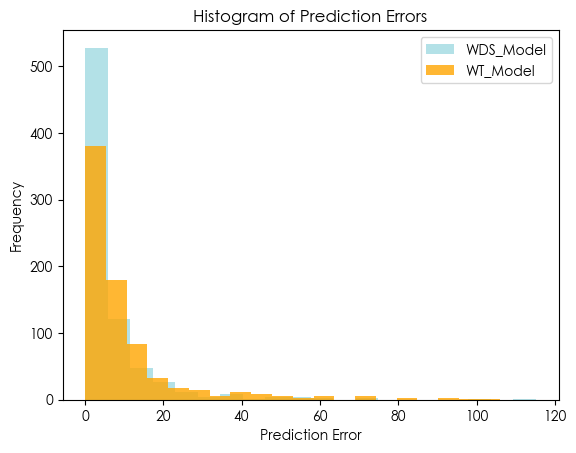

Shapiro-Wilk Test for WDS-Model Errors: statistic = 0.5535789132118225 p-value = 4.298469026331733e-40
Shapiro-Wilk Test for WT-Model Errors: statistic = 0.6239717602729797 p-value = 1.0416006188676827e-37
Anderson Test for WDS-Model Errors: statistic = 93.92014114817766
Anderson Test for WT-Model Errors: statistic = 86.06121443938616
Critical Values are: [0.573 0.653 0.783 0.913 1.086]


In [34]:

import matplotlib.pyplot as plt
import scipy.stats as st
# ... (your existing code to calculate errors_model1 and errors_model2)

# Histogram
plt.hist(abs(wds_test['Difference']), bins=20, alpha=0.4, label='WDS_Model', color='#41b6c4')
#plt.hist(abs(vert_test['Difference']), bins=20, alpha=0.6, label='Vert_Model')
plt.hist(abs(wt_test['Difference']), bins=20, alpha=0.8, label='WT_Model', color='orange')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Prediction Errors')
plt.show()

# Shapiro-Wilk Test for Normal Distribution
statistic, p_value = st.shapiro(abs(wds_test['Difference']))
print("Shapiro-Wilk Test for WDS-Model Errors: statistic =", statistic, "p-value =", p_value)
#statistic, p_value = st.shapiro(abs(vert_test['Difference']))
#print("Shapiro-Wilk Test for Vert-Model Errors: statistic =", statistic, "p-value =", p_value)
statistic, p_value = st.shapiro(abs(wt_test['Difference']))
print("Shapiro-Wilk Test for WT-Model Errors: statistic =", statistic, "p-value =", p_value)

# Anderson Test for Normal Distribution
res = st.anderson(abs(wds_test['Difference']))
print("Anderson Test for WDS-Model Errors: statistic =", res.statistic)
res = st.anderson(abs(wt_test['Difference']))
print("Anderson Test for WT-Model Errors: statistic =", res.statistic)

print(f"Critical Values are: {res.critical_values}")

In [11]:
import scipy.stats as st
import statistics

# Perform Wilcoxn Signed-Rank Test on ALL Mutant Data
print("Wilcoxn Signed-Rank Test on ALL Mutant Data")

statistic, p_value = st.wilcoxon(wds_test['Sqr_Err'], wt_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of WT-Model Square-Error = {statistics.median(wt_test['Sqr_Err']):.1f}nm\nMean of WT-Model Square-Error (MSE) = {statistics.mean(wt_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wt_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on ALL Mutant Data
Wilcoxon Test: Statistic = 86731.5 p-value = 3.9728314113398975e-22 

Median of WDS-Model Square-Error = 10.5nm
Mean of WDS-Model Square-Error (MSE) = 157.9 // Root Mean Square Error (RMSE) = 12.6nm

Median of WT-Model Square-Error = 28.5nm
Mean of WT-Model Square-Error (MSE) = 310.3 // Root Mean Square Error (RMSE) = 17.6nm


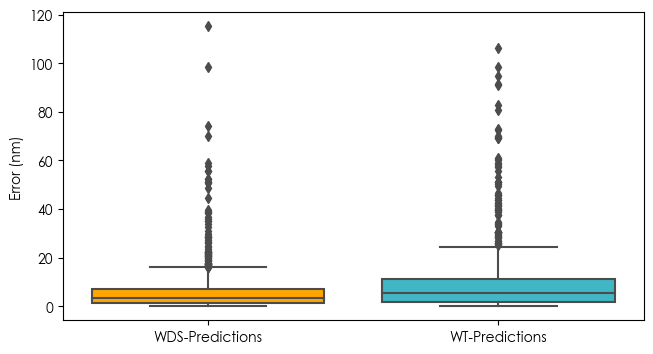

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but it enhances the aesthetics of plots
import pandas as pd

plt.figure(figsize = [7.50, 4.00])
#palette = sns.color_palette("Set2")
palette = ['orange','#41b6c4', ]

sns.boxplot(data=[abs(wds_test['Difference']),abs(wt_test['Difference'])], dodge=False, palette=palette, saturation=1)
# Customize axis labels
plt.xticks([0, 1], ["WDS-Predictions", "WT-Predictions"])
#plt.xlabel('Predictor')
plt.ylabel('Error (nm)')

#save file
fileout = 'mut_pred_test_err_bxplts.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_pred_test_err_bxplts.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

C:\Users\safra\AppData\Local\Temp\ipykernel_28028\1896741201.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max([d[idx] for d in data]) # Find the maximum value in each plot


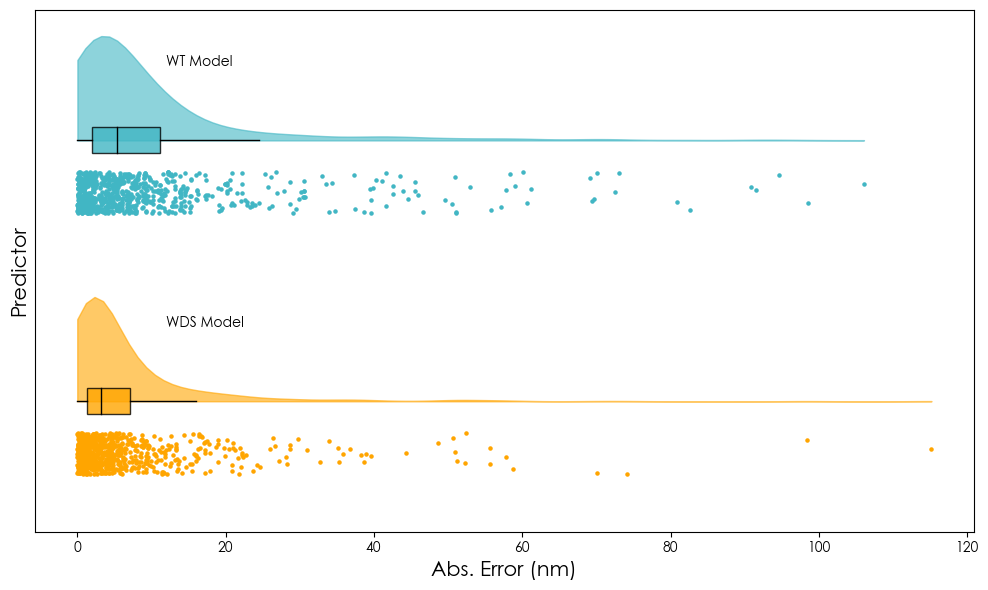

<Figure size 640x480 with 0 Axes>

In [9]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['orange', '#41b6c4']
data=[abs(wds_test['Difference']), abs(wt_test['Difference'])]
model_names = ["WDS Model", "WT Model"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text(max_val*10, idx + 1.3, model_name, va='center')

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
plt.yticks([])
plt.ylabel('Predictor', fontsize = 15)
plt.xlabel('Abs. Error (nm)', fontsize = 15)

plt.tight_layout()
#save file
fileout = 'mut_test_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_test_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

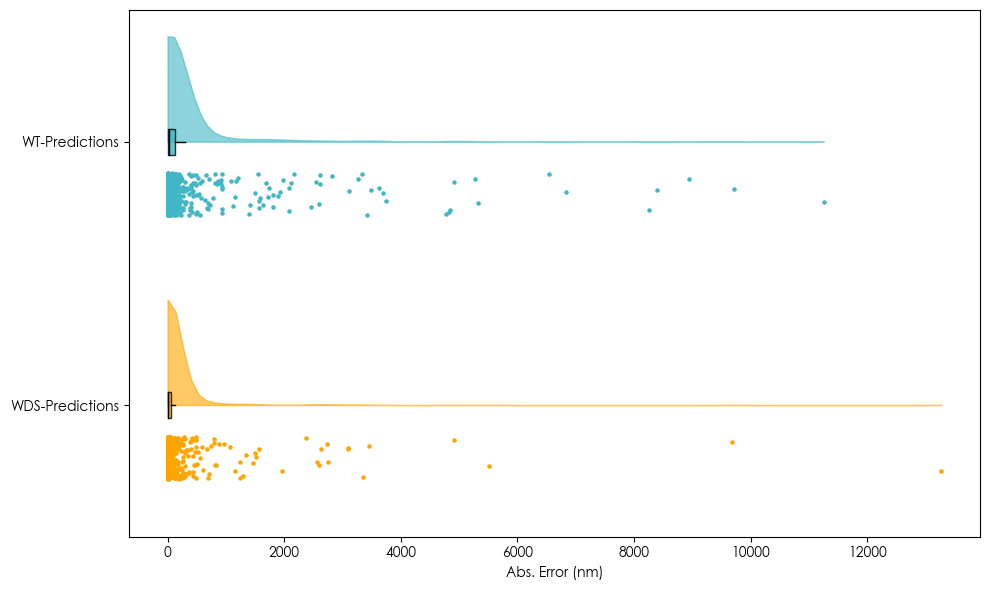

<Figure size 640x480 with 0 Axes>

In [39]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['orange', '#41b6c4']
data=[abs(wds_test['Sqr_Err']), abs(wt_test['Sqr_Err'])]
model_names = ["WDS-epi-Predictions", "WT-Predictions"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])



# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
plt.yticks([1, 2], ["WDS-Predictions", "WT-Predictions"])
#plt.xlabel('Predictor')
plt.xlabel('Abs. Error (nm)')

plt.tight_layout()
#save file
fileout = 'mut_test_sqr_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_test_sqr_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

In [40]:
wds_lrgshift_test = wds_test[wds_test['EdgeColors'] == '#762a83']
wt_lrgshift_test = wt_test[wt_test['Edge_Colors'] == '#762a83']

C:\Users\safra\AppData\Local\Temp\ipykernel_28860\1117578466.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max([d[idx] for d in data]) # Find the maximum value in each plot


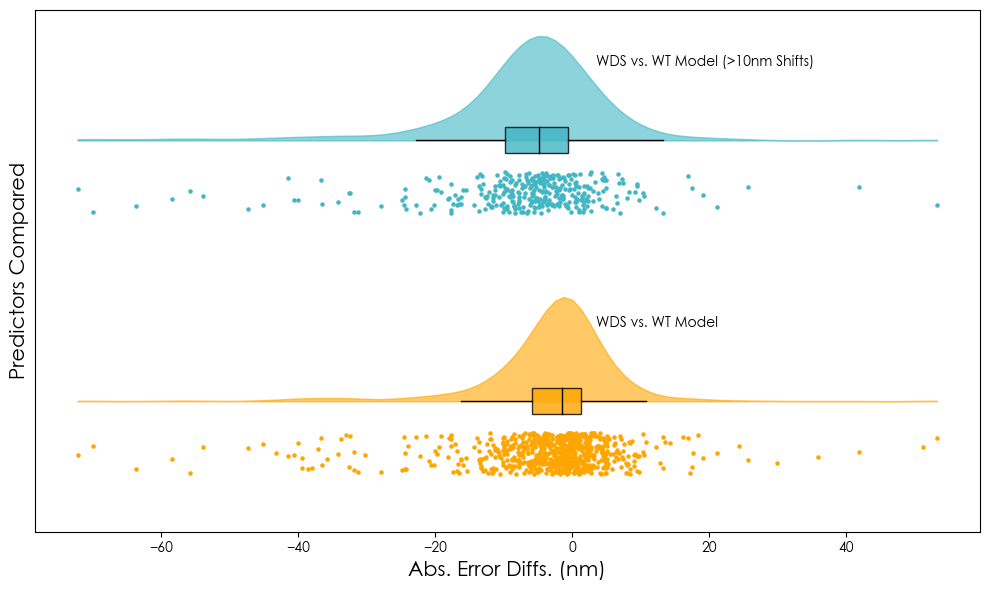

<Figure size 640x480 with 0 Axes>

In [43]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['orange','#41b6c4','purple']
data=[(abs(wds_test['Difference'])-abs(wt_test['Difference'])),(abs(wds_lrgshift_test['Difference'])-abs(wt_lrgshift_test['Difference']))]
model_names = ["WDS vs. WT Model", "WDS vs. WT Model (>10nm Shifts)"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text(-max_val*70, idx + 1.3, model_name, va='center')

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
#plt.yticks([1, 2, 3], ["WDS-epi-Predictions", "WT-Predictions", "Additive-Predictions"])
plt.yticks([])
plt.ylabel('Predictors Compared', fontsize = 15)
plt.xlabel('Abs. Error Diffs. (nm)', fontsize = 15)


plt.tight_layout()
#save file
fileout = 'mut_test_comp_err_rain_plt2.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_test_comp_err_rain_plt2.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

C:\Users\safra\AppData\Local\Temp\ipykernel_28860\3180626645.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max([d[idx] for d in data]) # Find the maximum value in each plot


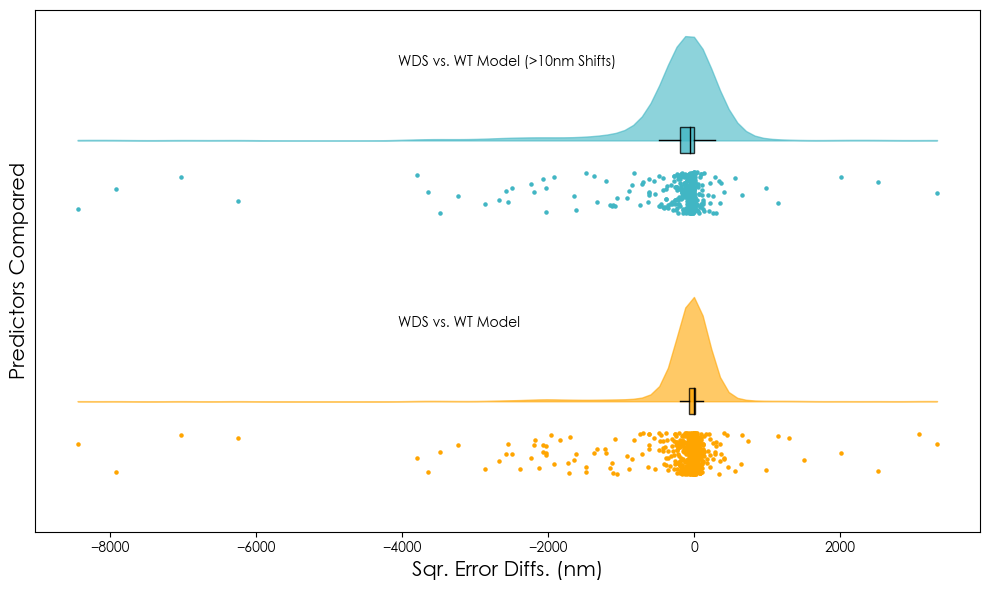

<Figure size 640x480 with 0 Axes>

In [49]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['orange','#41b6c4','purple']
data=[(abs(wds_test['Sqr_Err'])-abs(wt_test['Sqr_Err'])),(abs(wds_lrgshift_test['Sqr_Err'])-abs(wt_lrgshift_test['Sqr_Err']))]
model_names = ["WDS vs. WT Model", "WDS vs. WT Model (>10nm Shifts)"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text(max_val*35000, idx + 1.3, model_name, va='center')

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
#plt.yticks([1, 2, 3], ["WDS-epi-Predictions", "WT-Predictions", "Additive-Predictions"])
plt.yticks([])
plt.ylabel('Predictors Compared', fontsize = 15)
plt.xlabel('Sqr. Error Diffs. (nm)', fontsize = 15)


plt.tight_layout()
#save file
fileout = 'mut_test_comp_sqr_err_rain_plt2.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_test_comp_sqr_err_rain_plt2.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

In [36]:
# Perform Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Mutant Data
print("Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Mutant Data")

statistic, p_value = st.wilcoxon(wds_lrgshift_test['Sqr_Err'], wt_lrgshift_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_lrgshift_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_lrgshift_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_lrgshift_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of WT-Model Square-Error = {statistics.median(wt_lrgshift_test['Sqr_Err']):.1f}nm\nMean of WT-Model Square-Error (MSE) = {statistics.mean(wt_lrgshift_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wt_lrgshift_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Mutant Data
Wilcoxon Test: Statistic = 10802.0 p-value = 2.887467622944963e-25 

Median of WDS-Model Square-Error = 20.1nm
Mean of WDS-Model Square-Error (MSE) = 289.2 // Root Mean Square Error (RMSE) = 17.0nm

Median of WT-Model Square-Error = 105.0nm
Mean of WDS-Model Square-Error (MSE) = 585.1 // Root Mean Square Error (RMSE) = 24.2nm


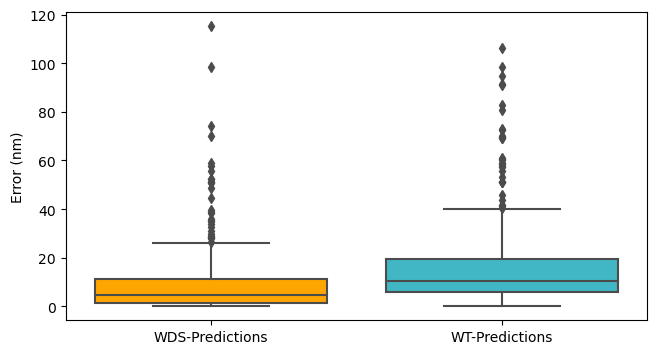

<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, but it enhances the aesthetics of plots
import pandas as pd

plt.figure(figsize = [7.50, 4.00])
#palette = sns.color_palette("Set2")
palette = ['orange','#41b6c4', ]

sns.boxplot(data=[abs(wds_lrgshift_test['Difference']),abs(wt_lrgshift_test['Difference'])], dodge=False, palette=palette, saturation=1)
# Customize axis labels
plt.xticks([0, 1], ["WDS-Predictions", "WT-Predictions"])
#plt.xlabel('Predictor')
plt.ylabel('Error (nm)')

#save file
fileout = 'mut_pred_test_err2_bxplts.png'
plt.savefig(fileout, format = 'png', dpi = 300)
fileout = 'mut_pred_test_err2_bxplts.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

In [53]:
wds_verts_test = wds_lrgshift_test[wds_lrgshift_test["Phylum"] == 'Chordata']
wt_verts_test = wt_lrgshift_test[wt_lrgshift_test["Phylum"] == 'Chordata']


In [54]:
# Perform Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Mutant Data
print("Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Mutant Data")

statistic, p_value = st.wilcoxon(wds_verts_test['Sqr_Err'], wt_verts_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_verts_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_verts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_verts_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of WT-Model Square-Error = {statistics.median(wt_verts_test['Sqr_Err']):.1f}nm\nMean of WT-Model Square-Error (MSE) = {statistics.mean(wt_verts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wt_verts_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Vertebrate Mutant Data
Wilcoxon Test: Statistic = 7976.0 p-value = 4.742997846725659e-21 

Median of WDS-Model Square-Error = 15.1nm
Mean of WDS-Model Square-Error (MSE) = 177.7 // Root Mean Square Error (RMSE) = 13.3nm

Median of WT-Model Square-Error = 95.8nm
Mean of WT-Model Square-Error (MSE) = 336.1 // Root Mean Square Error (RMSE) = 18.3nm


In [45]:
wds_inverts_test = wds_lrgshift_test[wds_lrgshift_test["Phylum"] != 'Chordata']
wt_inverts_test = wt_lrgshift_test[wt_lrgshift_test["Phylum"] != 'Chordata']

In [51]:
# Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Invertebrate Mutant Data
print("Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Invertebrate Mutant Data")

statistic, p_value = st.wilcoxon(wds_inverts_test['Sqr_Err'], wt_inverts_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_inverts_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_inverts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_inverts_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of WT-Model Square-Error = {statistics.median(wt_inverts_test['Sqr_Err']):.1f}nm\nMean of WT-Model Square-Error (MSE) = {statistics.mean(wt_inverts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wt_inverts_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Invertebrate Mutant Data
Wilcoxon Test: Statistic = 222.0 p-value = 6.245430592352851e-06 

Median of WDS-Model Square-Error = 77.4nm
Mean of WDS-Model Square-Error (MSE) = 905.9 // Root Mean Square Error (RMSE) = 30.1nm

Median of WT-Model Square-Error = 140.4nm
Mean of WT-Model Square-Error (MSE) = 1961.7 // Root Mean Square Error (RMSE) = 44.3nm


In [55]:
wds_verts_test = wds_test[wds_test["Phylum"] == 'Chordata']

In [59]:
# Perform Wilcoxn Signed-Rank Test on ALL Vert Mutant Data [WDS vs. Vert Model]
print("Wilcoxn Signed-Rank Test on ALL Vertebrate Mutant Data")

statistic, p_value = st.wilcoxon(wds_verts_test['Sqr_Err'], vert_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_verts_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_verts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_verts_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of Vert-Model Square-Error = {statistics.median(vert_test['Sqr_Err']):.1f}nm\nMean of Vert-Model Square-Error (MSE) = {statistics.mean(vert_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(vert_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on ALL Vertebrate Mutant Data
Wilcoxon Test: Statistic = 96648.0 p-value = 0.024322216344366054 

Median of WDS-Model Square-Error = 9.4nm
Mean of WDS-Model Square-Error (MSE) = 101.4 // Root Mean Square Error (RMSE) = 10.1nm

Median of Vert-Model Square-Error = 11.0nm
Mean of Vert-Model Square-Error (MSE) = 116.9 // Root Mean Square Error (RMSE) = 10.8nm


In [57]:
wds_verts_lrgshifts_test = wds_verts_test[wds_verts_test['EdgeColors'] == '#762a83']
vert_lrgshifts_test = vert_test[vert_test['EdgeColors'] == '#762a83']

In [60]:
# Perform Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Vert Mutant Data [WDS vs. Vert Model]
print("Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Vertebrate Mutant Data")

statistic, p_value = st.wilcoxon(wds_verts_lrgshifts_test['Sqr_Err'], vert_lrgshifts_test['Sqr_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of WDS-Model Square-Error = {statistics.median(wds_verts_lrgshifts_test['Sqr_Err']):.1f}nm\nMean of WDS-Model Square-Error (MSE) = {statistics.mean(wds_verts_lrgshifts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(wds_verts_lrgshifts_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of Vert-Model Square-Error = {statistics.median(vert_lrgshifts_test['Sqr_Err']):.1f}nm\nMean of Vert-Model Square-Error (MSE) = {statistics.mean(vert_lrgshifts_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(vert_lrgshifts_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on LARGE-SHIFT (>10nm) Vertebrate Mutant Data
Wilcoxon Test: Statistic = 18769.0 p-value = 0.02832884021263523 

Median of WDS-Model Square-Error = 15.1nm
Mean of WDS-Model Square-Error (MSE) = 177.7 // Root Mean Square Error (RMSE) = 13.3nm

Median of Vert-Model Square-Error = 24.2nm
Mean of Vert-Model Square-Error (MSE) = 219.0 // Root Mean Square Error (RMSE) = 14.8nm
